In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

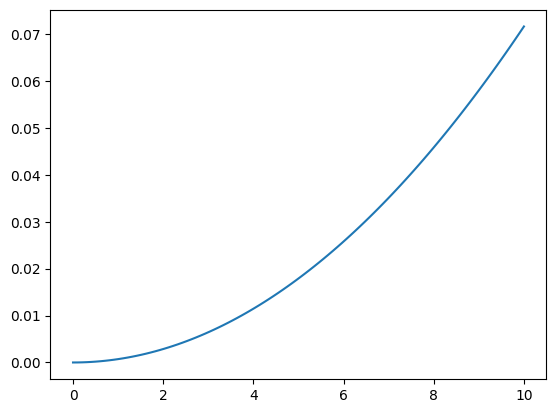

In [2]:
# D = 42.7 mm
# mass = 45.9 g

def drag(velocity, rho=1., A=np.pi*(42.7e-3/2)**2):
    return -0.5*rho*A*velocity*velocity

plt.plot(np.linspace(0, 10, 100), drag(np.linspace(0, 10, 100)))